In [1]:
import requests, json, cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# download and save data file for LOL champions. The "champion.json" returns a list of champions with a brief summary.
url="http://ddragon.leagueoflegends.com/cdn/12.12.1/data/en_US/champion.json"
reqs = requests.get(url)
dictionary = reqs.json()

# serializing json (dict to str)
json_object = json.dumps(dictionary, indent = 2)

In [3]:
# filter all the LOL champion names
championNames = dictionary['data'].keys()

for name in championNames:
    # download all the LOL champion images(png)
    url="http://ddragon.leagueoflegends.com/cdn/12.12.1/img/champion/" + name + ".png"
    reqs = requests.get(url)

    with open("Champions//"+ name + ".png", "wb") as file:  # write and binary mode
        file.write(reqs.content) 

In [4]:
# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB, you need to convert it
championNumpy = np.stack([cv2.cvtColor(cv2.imread("Champions//"+ name + ".png"), cv2.COLOR_BGR2RGB) for name in championNames], axis=0)

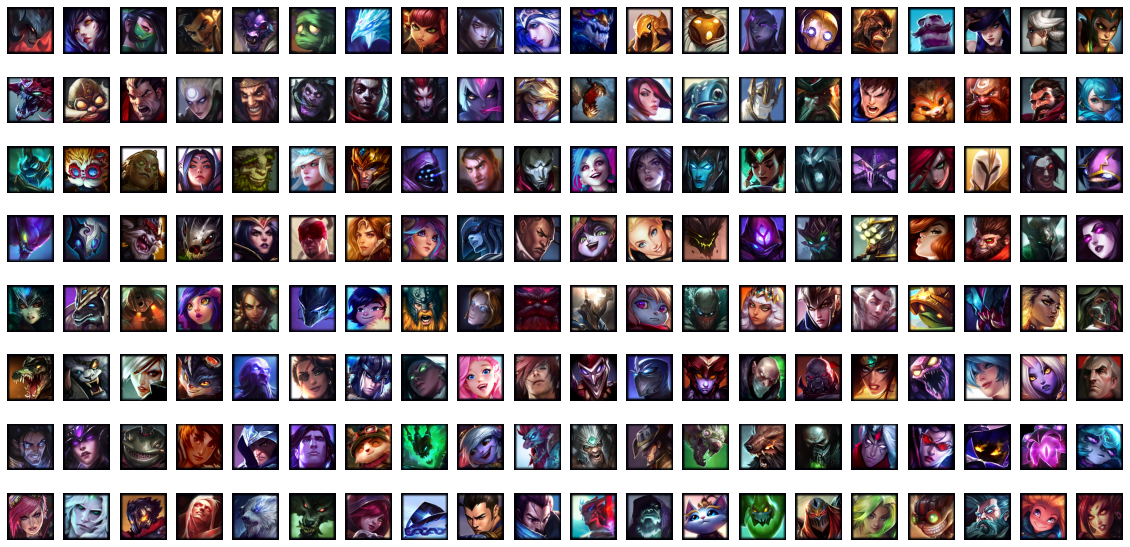

In [5]:
row = 8
col = 20
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(20, 10))

for index in range(row*col):
    # The subplot will take the index position on a grid with nrows rows and ncols columns.
    ax = plt.subplot(row, col, index+1)
    ax.imshow(championNumpy[index, :,:])
    ax.axis('off')

In [6]:
# save to .json
with open("champion.json", "w") as outfile:
    outfile.write(json_object)
    
# save to .npy
np.save('champions', championNumpy)